In [2]:
import seaborn as sns

df = sns.load_dataset("titanic")
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Exploratory Data Analysis – Titanic Dataset

## Objective
To analyze factors influencing passenger survival on the Titanic using
statistical and visual exploration techniques.


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [22]:
df = sns.load_dataset("titanic")
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [23]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [24]:
# Fill missing age with median
df['age'].fillna(df['age'].median(), inplace=True)

# Drop deck due to excessive missing values
df.drop(columns=['deck'], inplace=True)

# Fill missing embarked values
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

df.isnull().sum()


C:\Users\Jatin\AppData\Local\Temp\ipykernel_876\1435354374.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\Jatin\AppData\Local\Temp\ipykernel_876\1435354374.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

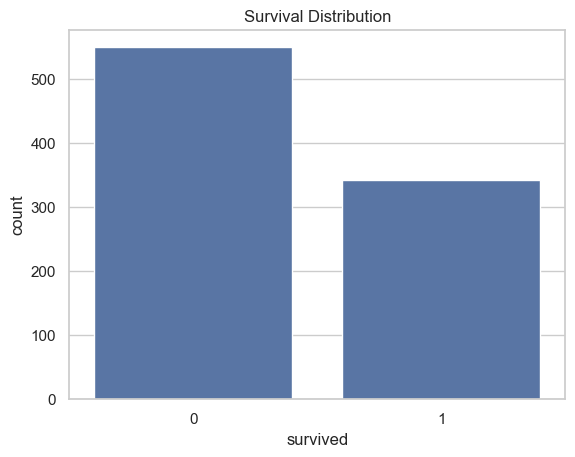

survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [25]:
sns.countplot(x='survived', data=df)
plt.title("Survival Distribution")
plt.show()

df['survived'].value_counts(normalize=True)


Approximately 62% of passengers did not survive,
while 38% survived. The dataset is moderately imbalanced.


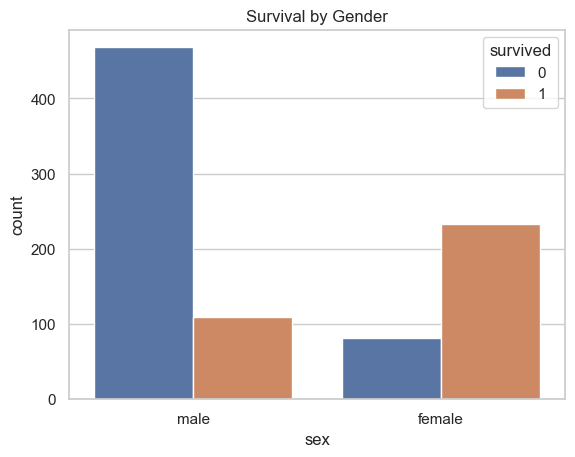

survived,0,1
sex,,
female,0.257962,0.742038
male,0.811092,0.188908


In [26]:
sns.countplot(x='sex', hue='survived', data=df)
plt.title("Survival by Gender")
plt.show()

pd.crosstab(df['sex'], df['survived'], normalize='index')


Female survival rate ≈ 74%
Male survival rate ≈ 19%

Gender was a strong predictor of survival.


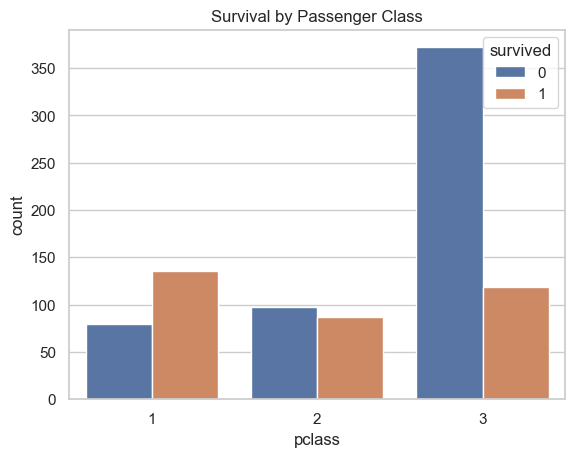

survived,0,1
pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


In [27]:
sns.countplot(x='pclass', hue='survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()

pd.crosstab(df['pclass'], df['survived'], normalize='index')


Survival decreases as passenger class decreases.
1st class had highest survival (~63%), 3rd class lowest (~24%).


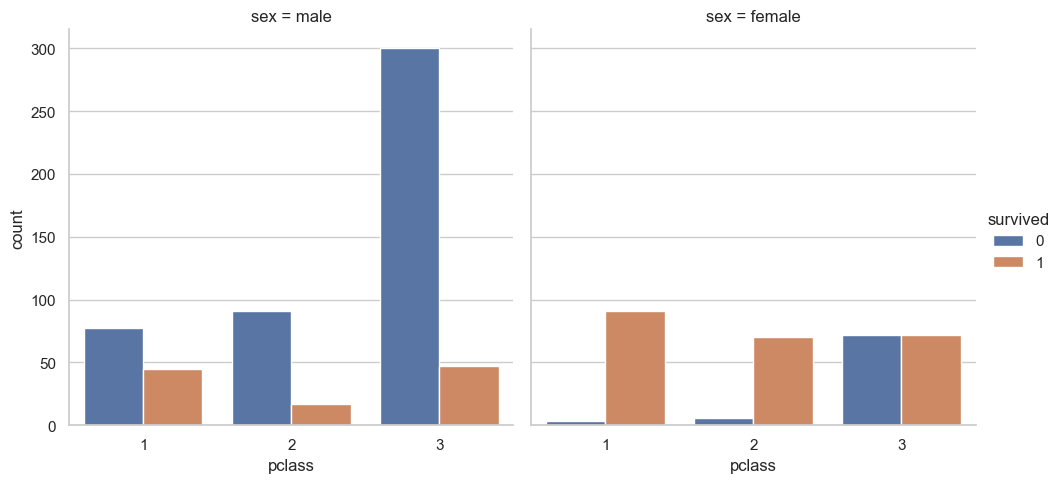

In [28]:
sns.catplot(x='pclass', hue='survived', col='sex',
            data=df, kind='count')
plt.show()


Third-class males had the lowest survival rate.
First-class females had the highest survival rate.


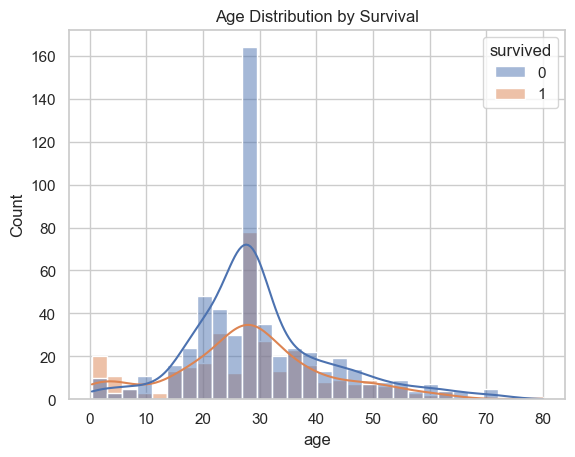

survived
0    30.028233
1    28.291433
Name: age, dtype: float64

In [29]:
sns.histplot(data=df, x='age', hue='survived', kde=True, bins=30)
plt.title("Age Distribution by Survival")
plt.show()

df.groupby('survived')['age'].mean()


Age shows a moderate relationship with survival.
Survivors were slightly younger on average.


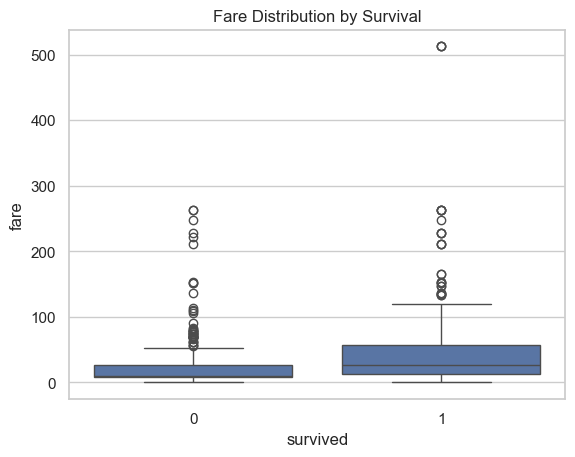

survived
0    22.117887
1    48.395408
Name: fare, dtype: float64

In [30]:
sns.boxplot(x='survived', y='fare', data=df)
plt.title("Fare Distribution by Survival")
plt.show()

df.groupby('survived')['fare'].mean()


Survivors paid significantly higher fares on average.
Fare is positively associated with survival.


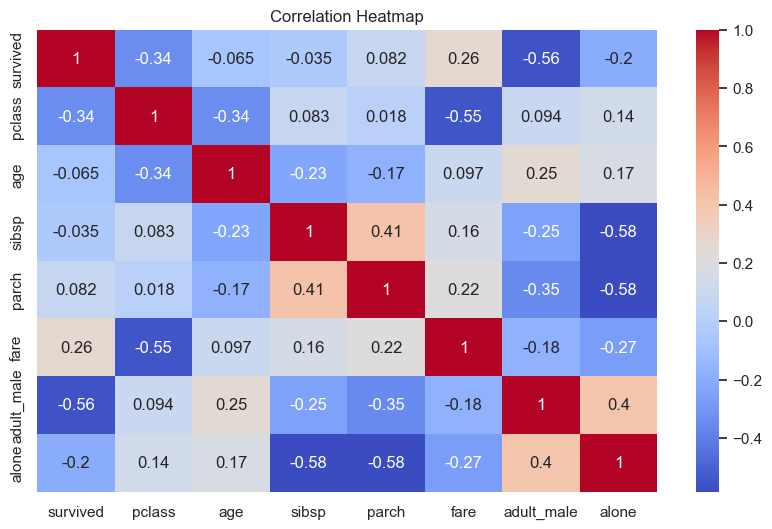

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Strongest correlation with survival: adult_male (-0.56)
Moderate correlation: pclass (-0.34), fare (0.26)
Weak correlation: age (-0.08)


# Key Findings

1. Gender was the strongest predictor of survival.
2. Passenger class significantly influenced survival probability.
3. Higher fare (economic status) increased survival likelihood.
4. Age had a moderate but weaker influence compared to gender and class.
5. Third-class males were the most vulnerable group.
6. First-class females had the highest survival rate.

## Conclusion

Survival on the Titanic was strongly influenced by
gender and socioeconomic status, with evacuation policies
favoring women and higher-class passengers.
